In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import helpers

In [2]:

df_01 = helpers.import_detections('/media/sda/data/borehole/detections/01*.csv')
df_02 = helpers.import_detections('/media/sda/data/borehole/detections/02*.csv')

In [3]:
df_01['time'] = pd.to_datetime(df_01['time'])

In [4]:
df_01 = df_01.sort_values(by='time')

In [5]:
df_01['ones'] = 1

In [6]:
df_01['event_idx'] = np.arange(0, df_01.shape[0], 1)

In [7]:
df_01.set_index('time', inplace=True)

Text(0, 0.5, 'cumulative number of events')

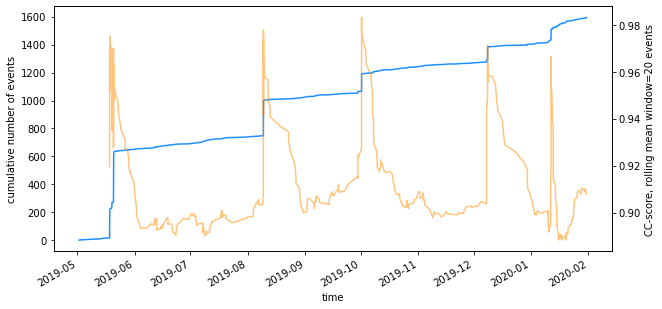

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
df_01.cumsum()['ones'].plot(ax=ax, color='dodgerblue')

ax2 = ax.twinx()
df_01.similarity.rolling(window=20).mean().plot(ax=ax2, color='darkorange', alpha=0.5)
ax2.set_ylabel('CC-score, rolling mean window=20 events')
# ax.set_yscale('log')
ax.set_ylabel('cumulative number of events')
# ax.set_yscale('log')

In [9]:
# fig, ax = plt.subplots(figsize=(10, 5))
# dndt = (df.similarity.rolling(window=20).mean().diff()[:-1]/((df.similarity.rolling(window=20).mean().index[1:]-df.similarity.rolling(window=20).mean()[:-1].index).total_seconds())/86400)
# dndt.plot(fig=fig)


In [10]:
# (df.similarity.rolling(window=20).mean().index[1:]-df.similarity.rolling(window=20).mean()[:-1].index).total_seconds()

In [11]:
# df.similarity.plot()

In [12]:
# days_count = df.groupby(pd.Grouper(freq='1D')).sum()
# days_count[days_count.ones > 2]

<AxesSubplot:xlabel='template_id'>

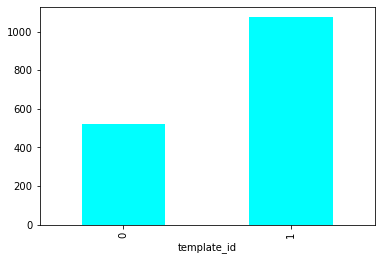

In [28]:
df_01.groupby('template_id').count().ones.plot.bar(color='cyan')

In [14]:
df_02['time'] = pd.to_datetime(df_02['time'])
df_02 = df_02.sort_values(by='time')
df_02['ones'] = 1
df_02['event_idx'] = np.arange(0, df_02.shape[0], 1)
df_02.set_index('time', inplace=True)

Text(0, 0.5, 'cumulative number of events')

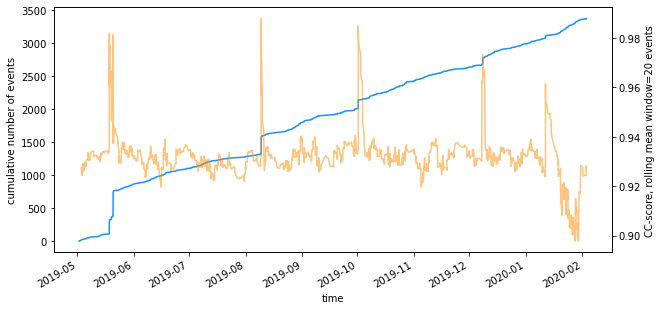

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
df_02.cumsum()['ones'].plot(ax=ax, color='dodgerblue')

ax2 = ax.twinx()
df_02.similarity.rolling(window=20).mean().plot(ax=ax2, color='darkorange', alpha=0.5)
ax2.set_ylabel('CC-score, rolling mean window=20 events')
# ax.set_yscale('log')
ax.set_ylabel('cumulative number of events')
# ax.set_yscale('log')

<AxesSubplot:xlabel='template_id'>

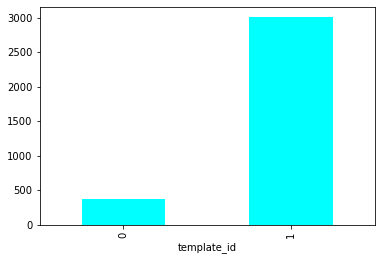

In [16]:
fig, ax = plt.subplots()
df_02.groupby('template_id').count().ones.plot.bar(color='cyan', ax=ax)

In [17]:
import obspy
from obspy.signal import filter
from obspy import read, UTCDateTime as UTC

def digest_data(filedir):
    stream = obspy.read(filedir)
    stream.detrend('demean')
    stream.normalize()
    stream[0].data = filter.highpass(stream[0].data, freq=40, df=1000)
    stream[0].data = filter.lowpass(stream[0].data, freq=5, df=1000)
    return stream

def make_template_02():
    template_dir = '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138'
    template = digest_data(template_dir)
    pick = UTC('2019-05-18T11:57:41.532000Z')
    template = template.trim(pick-0.015, pick+0.25)
    return template

def make_template_1_02():
    template_dir = '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.274'
    template = digest_data(template_dir)
    pick1 = UTC('2019-10-01T12:32:11.95Z')
    pick2 = UTC('2019-10-01T12:32:12.13Z')
    template = template.trim(pick1, pick2)
    return template

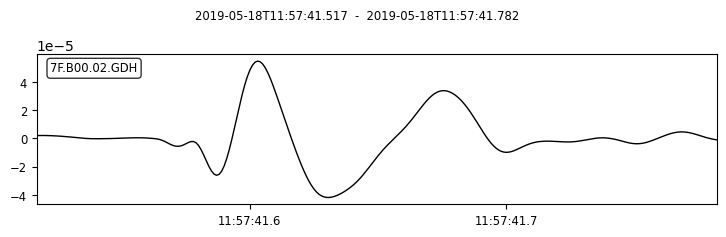

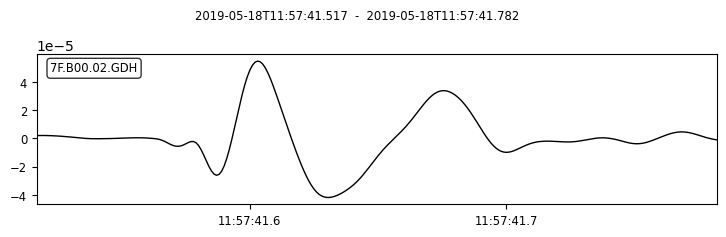

In [18]:
make_template_02().plot()

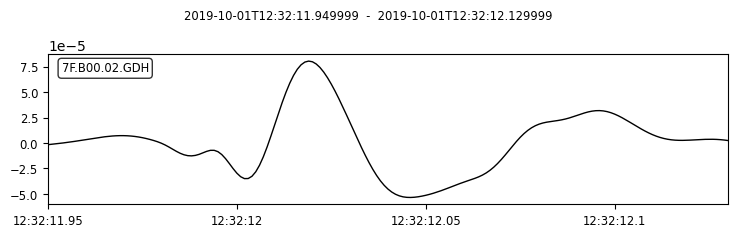

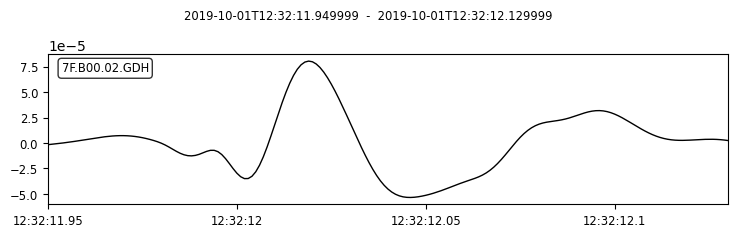

In [19]:
make_template_1_02().plot()

In [20]:
# def find_template_in_data(datadir, templates, phone):
#     day = datadir.split('.')[-1]
#     print('finding template for day', day)
#     data = digest_data(datadir)
#     height = 0.875
#     distance = 3
# #     template = make_template()
# #     template2 = make_template_1()
# #     templates = [template, template2]
#     detections, sims = correlation_detector(stream=data
#                                         , templates=templates
#                                         , heights=height
#                                         , distance=distance
#                                         , plot=None)
#     data_writing_location = '/media/sda/data/borehole/detections/' + phone + day
#     try:
#         sims[0].write(data_writing_location + phone + '_similarity.mseed', format='MSEED')
#     except AttributeError:
#         # TODO : what is this error handling? Is it because it finds nothing and so
#         #        there is nothing to write?
#         print('there is an error writing similarity for day', str(day))
#     df = pd.DataFrame(detections)
#     df.to_csv(data_writing_location + phone + '_detections.csv', index=False)
#     del detections, sims, df, data

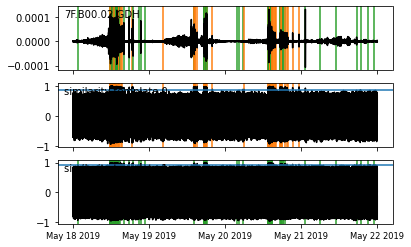

In [21]:
from obspy.signal.cross_correlation import correlation_detector

filelocstr = '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.'

filelocs = [filelocstr+str(s) for s in np.arange(138, 143, 1).astype(int)]


data = (digest_data(filelocs[0]) + digest_data(filelocs[1]) + digest_data(filelocs[2]) + digest_data(filelocs[3])).merge()

templates = [make_template_02(), make_template_1_02()]

# height = 0.875
height = [0.875, 0.925]
distance = 3

ccs = correlation_detector(stream=data
                    , templates=templates
                    , heights=height
                    , distance=distance
                    , plot=data
                    )

In [22]:
# s1 = digest_data(filelocs[0]) 
# s2 = digest_data(filelocs[1])

# (s1+s2).merge()

In [23]:
# test.delta_seconds.rolling(window=20).mean().plot( color='dodgerblue')
# ax[0].set_yscale('log')
# ax[0].set_ylabel('delta seconds')

In [24]:
# test.groupby(pd.Grouper(freq='6h')).sum()

In [25]:
# days_count = df.groupby(pd.Grouper(freq='1D')).sum()
# days_count[days_count.ones > 2]

In [26]:
# test[test.timediff==test.timediff.min()]

In [27]:
# df[df.event_idx==38]